## Load Libraties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [4]:
aerofit_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## 2.Outlier detection using boxplot

(array([0, 1, 2]),
 [Text(0, 0, 'KP281'), Text(1, 0, 'KP481'), Text(2, 0, 'KP781')])

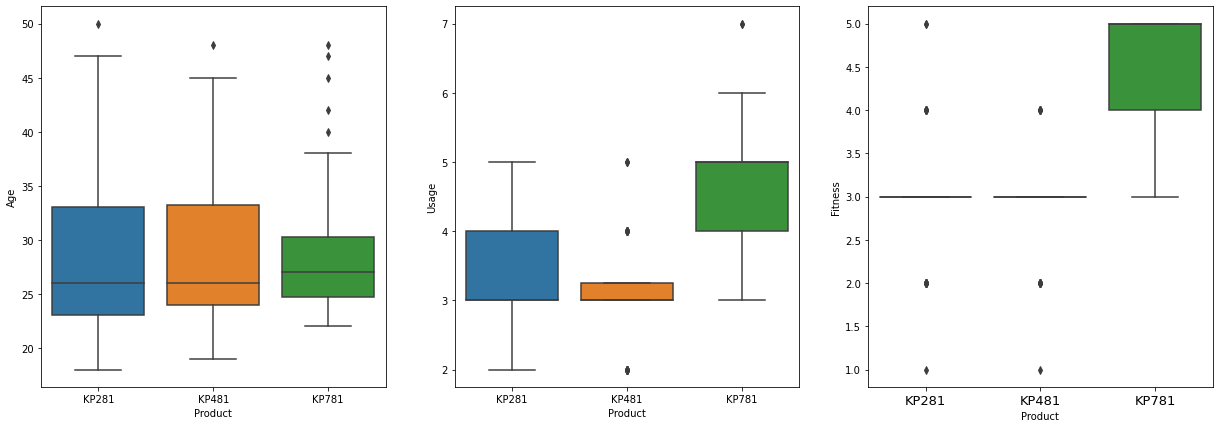

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.boxplot(x = 'Product', y = 'Age', data=aerofit_df, ax=ax1)
sns.boxplot(x = 'Product', y = 'Usage', data=aerofit_df, ax=ax2)
sns.boxplot(x = 'Product', y = 'Fitness', data=aerofit_df, ax=ax3)
plt.xticks(fontsize= 13)
# plt.title('Box plot of numerical columns', fontsize=16);

In [14]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [16]:
aerofit_df['Fitness'].median()

3.0

## 3. Other feature effect on the product purchased

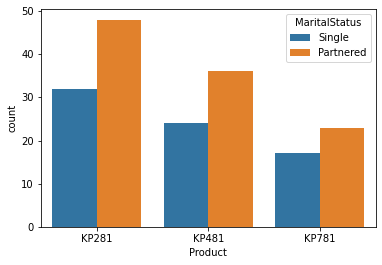

In [18]:
ax = sns.countplot(x="Product", data=aerofit_df, hue='MaritalStatus')

In [19]:
## Looks the Partnered persons purchased more than Single (in all 3 categories of the product)

<AxesSubplot:xlabel='Age', ylabel='Count'>

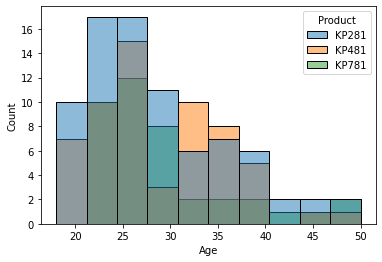

In [34]:
sns.histplot(data=aerofit_df, x="Age", bins=10, hue='Product')

In [27]:
## Who all are aged around 25 purchased more product compare with others.
## The persons aged around 30 to 37 (approx) purchased product KP481

<AxesSubplot:xlabel='Income', ylabel='Count'>

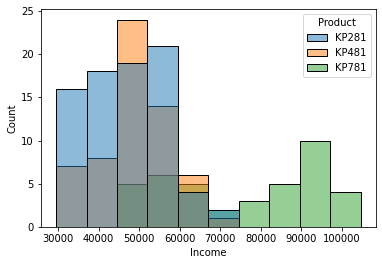

In [35]:
sns.histplot(data=aerofit_df, x="Income", bins=10, hue='Product')

In [36]:
## High income group people prefers KP781

<AxesSubplot:xlabel='Gender', ylabel='Count'>

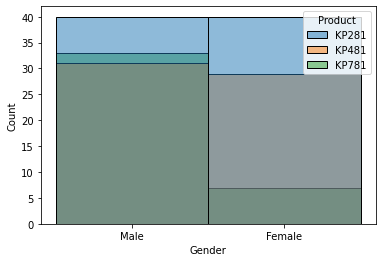

In [39]:
sns.histplot(data=aerofit_df, x="Gender", bins=10, hue='Product')

In [ ]:
## Most mens like KP781 compare with Females
## More Females like KP281 compare with Males

## 4.Representing the marginal probability like - against Product

In [31]:
pd.crosstab(aerofit_df.Product, aerofit_df.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [32]:
pd.crosstab(aerofit_df.Product, aerofit_df.Gender)

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


## 5.Correlation among different factors

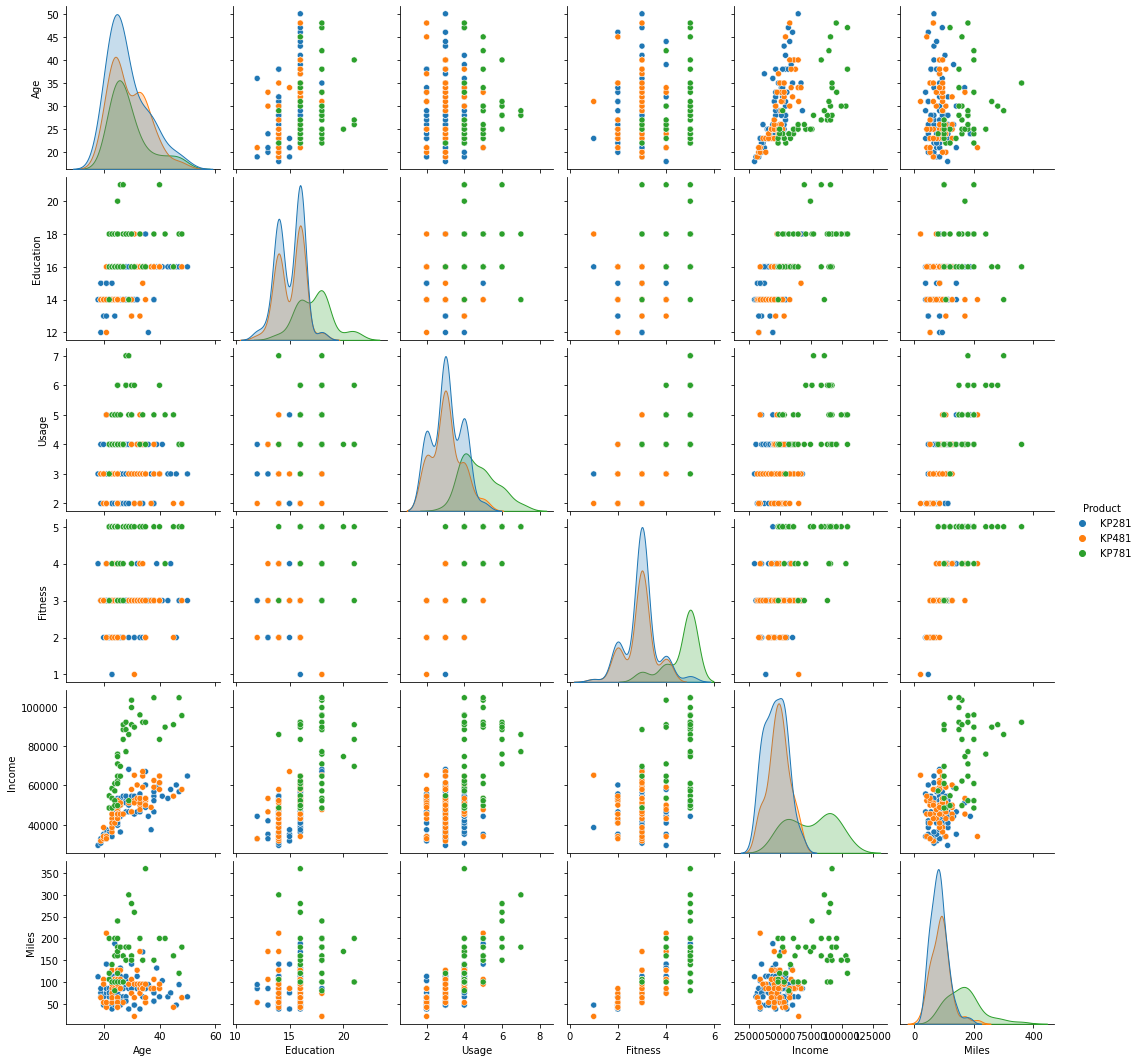

In [44]:
sns.pairplot(aerofit_df, hue='Product')

## Data to identify probability

In [57]:
aerofit_df[(aerofit_df['Product'] == 'KP781') & (aerofit_df['Gender'] == 'Male')].count()

Product          33
Age              33
Gender           33
Education        33
MaritalStatus    33
Usage            33
Fitness          33
Income           33
Miles            33
dtype: int64

In [58]:
aerofit_df[(aerofit_df['Product'] == 'KP781') & (aerofit_df['Gender'] == 'Female')].count()

Product          7
Age              7
Gender           7
Education        7
MaritalStatus    7
Usage            7
Fitness          7
Income           7
Miles            7
dtype: int64

In [59]:
aerofit_df[(aerofit_df['Gender'] == 'Female')].count()

Product          76
Age              76
Gender           76
Education        76
MaritalStatus    76
Usage            76
Fitness          76
Income           76
Miles            76
dtype: int64